In [2]:

import keras
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from sklearn.preprocessing import Normalizer
from keras.utils import to_categorical
from keras.layers import Dropout,Dense,Flatten,Convolution1D,MaxPooling1D
from keras import callbacks
from keras.callbacks import CSVLogger
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from keras.models import load_model







In [3]:

data1 = pd.read_csv("mitbih_test.csv",header=None)
data2=pd.read_csv("mitbih_train.csv",header=None)

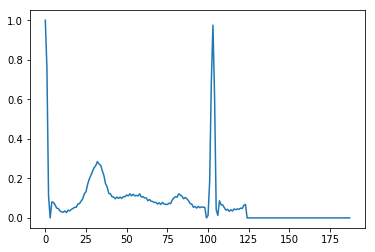

In [4]:
plt.plot(data1.iloc[0, :])
plt.show()
x_test=data1.iloc[:,0:187]
y_test=data1.iloc[:,187]
x_train=data2.iloc[:,0:187]
y_train=data2.iloc[:,187]


In [5]:
x_train.shape

(87554, 187)

In [6]:
scalar=Normalizer().fit(x_train)
trainx=scalar.transform(x_train)

In [7]:

scalar=Normalizer().fit(x_test)
testT=scalar.transform(x_test)

In [8]:
y_test1=np.array(y_test)
y_train1=np.array(y_train)
y_test=to_categorical(y_test1)
y_train=to_categorical(y_train1)

In [9]:
x_train=np.reshape(trainx,(trainx.shape[0],trainx.shape[1],1))
x_test=np.reshape(testT,(testT.shape[0],testT.shape[1],1))

In [10]:
x_train.shape

(87554, 187, 1)

In [11]:
model = Sequential()
model.add(Convolution1D(64, 3, border_mode="same",activation='relu', input_shape=(187,1)))
model.add(MaxPooling1D(pool_length=(2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               761984    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 762,885
Trainable params: 762,885
Non-trainable params: 0
_________________________________________________________________


C:\Users\seshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", input_shape=(187, 1), padding="same")`
  
C:\Users\seshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
checkpointer = callbacks.ModelCheckpoint(filepath="checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger=CSVLogger('cnntrainanalysis1.csv',separator=',',append=False)
model.fit(x_train, y_train, nb_epoch=1, callbacks=[checkpointer,csv_logger])
model.save("cnn_model.hdf5")

C:\Users\seshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/1
87554/87554 [==============================] - 109s 1ms/step - loss: 0.1162 - acc: 0.9634

Epoch 00001: loss improved from inf to 0.11619, saving model to checkpoint-01.hdf5


In [14]:
loaded_model = load_model('cnn_model.hdf5')
loaded_model.load_weights('checkpoint-01.hdf5')


In [15]:
loaded_model=load_model('checkpoint-01.hdf5')

In [16]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               761984    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 762,885
Trainable params: 762,885
Non-trainable params: 0
_________________________________________________________________


In [17]:
y_pred=loaded_model.predict_classes(x_test)
np.savetxt('expectedtf.txt',y_test1,fmt='%01d')
np.savetxt('predictedtf.txt',y_pred,fmt='%01d')
loaded_model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
loss,accuracy=model.evaluate(x_test,y_test)
print("\nLoss: %.2f,Accuracy: %.2f%%" %(loss,accuracy*100))

21892/21892 [==============================] - 4s 184us/step

Loss: 0.08,Accuracy: 97.75%


In [18]:
mat=confusion_matrix(y_test1, y_pred)
mat=pd.DataFrame(mat)
mat

file = open("predicted_wrong.csv",'a')

file.write("index,actual,predicted" + '\n')
for i in range(0,len(y_test1)):
    if (y_test1[i] != y_pred[i]):
        #print('yes')
        file.write(str(i) + ',' + str( y_test1[i]) + ',' +str(y_pred[i]) + '\n')
    
file.close()

In [22]:
#### wrong predicted values
ind = pd.read_csv('wrong.csv')
ind

,index,actual,predicted
0,100,0.0,2
1,325,0.0,4
2,345,0.0,2
3,528,0.0,4
4,704,0.0,2
5,753,0.0,2
6,851,0.0,2
7,1031,0.0,2
8,1453,0.0,4
9,1498,0.0,2
